In [48]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from collections import defaultdict

In [49]:
tr_dat = defaultdict(list)

In [50]:
for file in os.listdir('./pkl'):
    with open(os.path.join("./pkl", file), 'rb') as f:
        dat = pickle.load(f)
        name = file.split('_with_')[0]
        tr_dat[name].append(dat)


In [51]:
def save_plot(x, name, labels):
    plt.figure(figsize=(10, 7))
    plt.plot(
        x, linestyle='-', 
        label=labels
    )
    plt.xlabel('Epochs')
    plt.ylabel(name)
    plt.legend()
    plt.savefig(f"{name}.png")

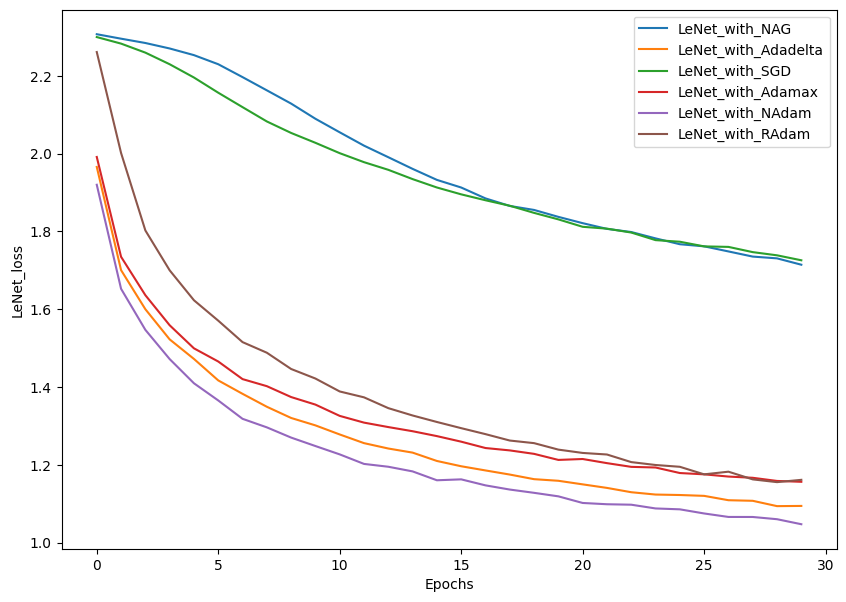

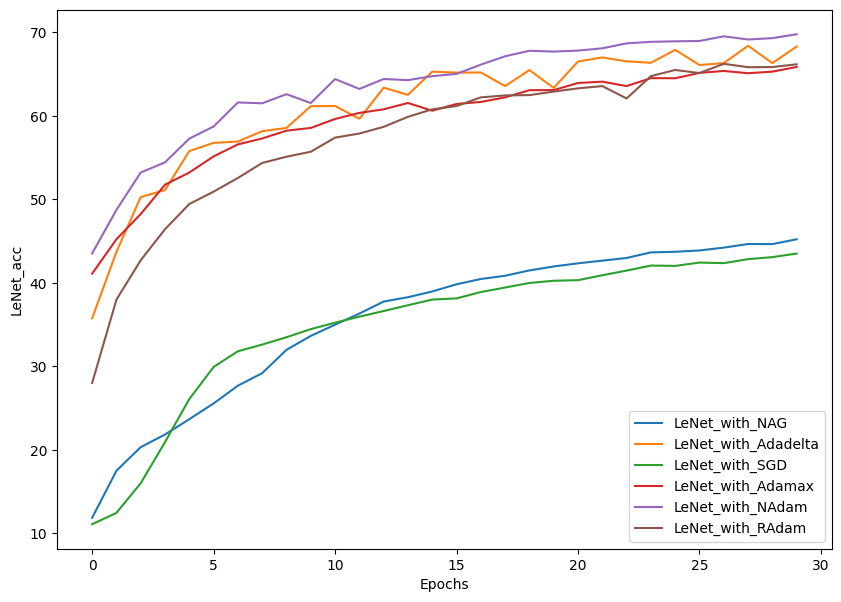

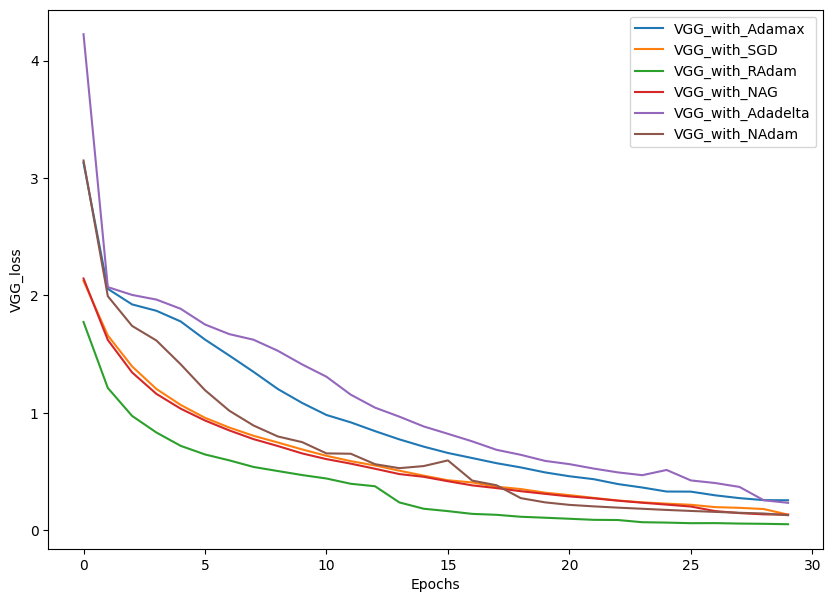

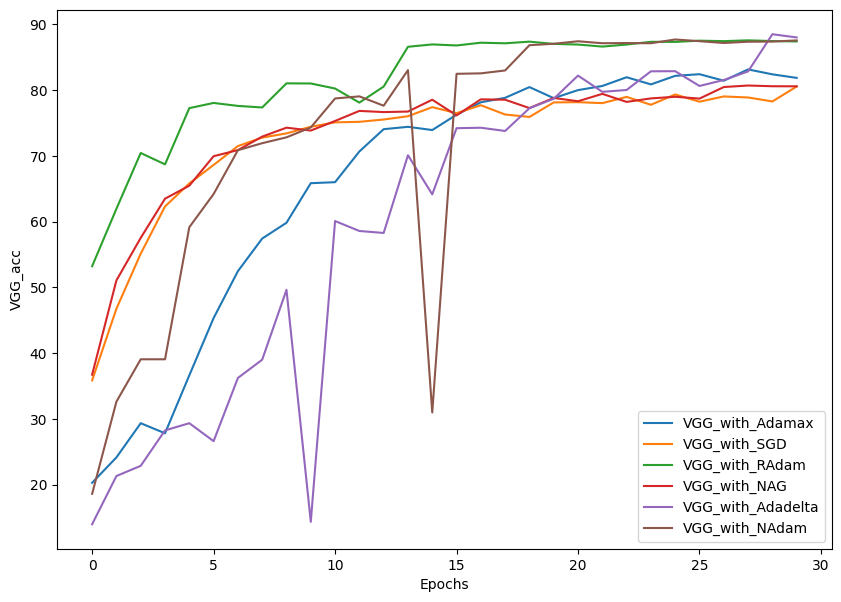

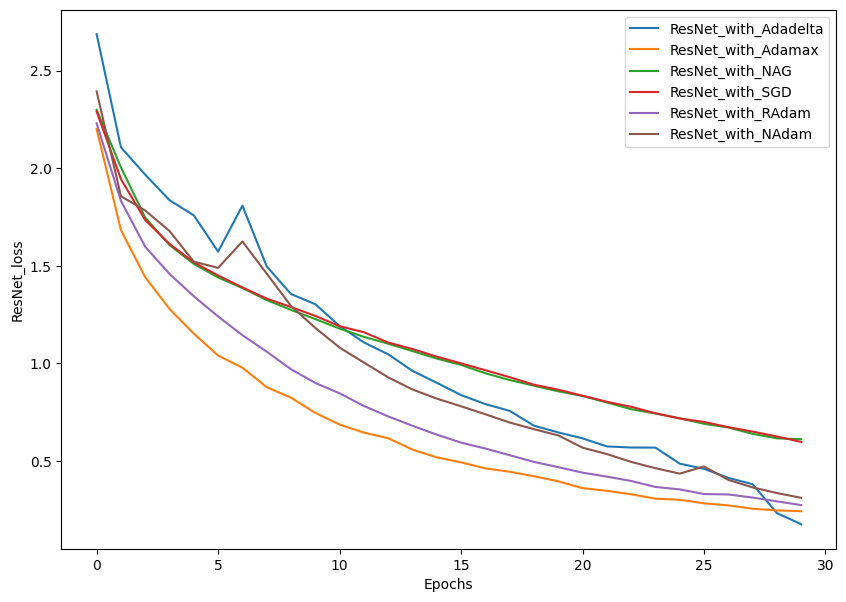

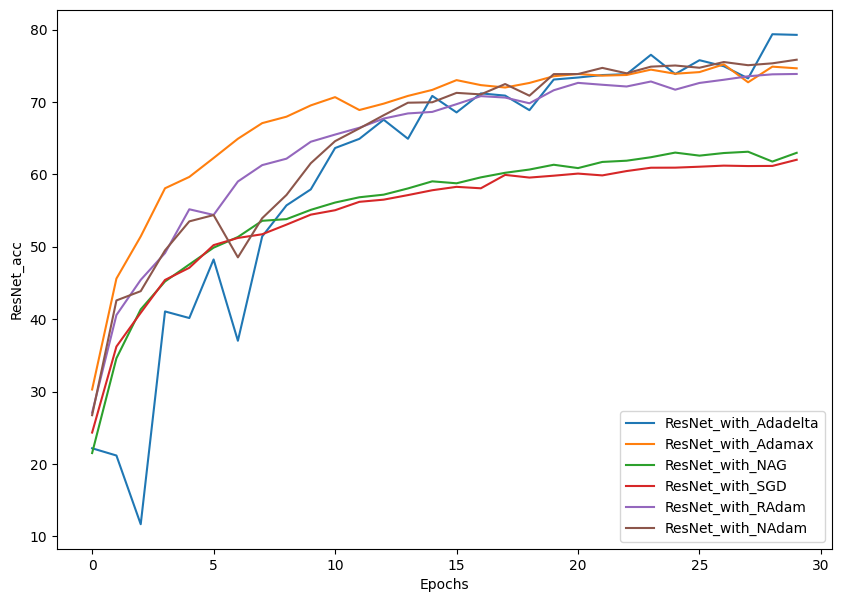

In [52]:
best_of_class = []
for name in tr_dat.keys():
    models = tr_dat[name]
    save_plot(
        np.array([model['train_losses'] for model in models]).T,
        f"{name}_loss",
        [model['name'] for model in models],
    )
    save_plot(
        np.array([model['val_accs'] for model in models]).T,
        f"{name}_acc",
        [model['name'] for model in models],
    )
    best_of_class.append(max(models, key=lambda x: x['best_valid']))

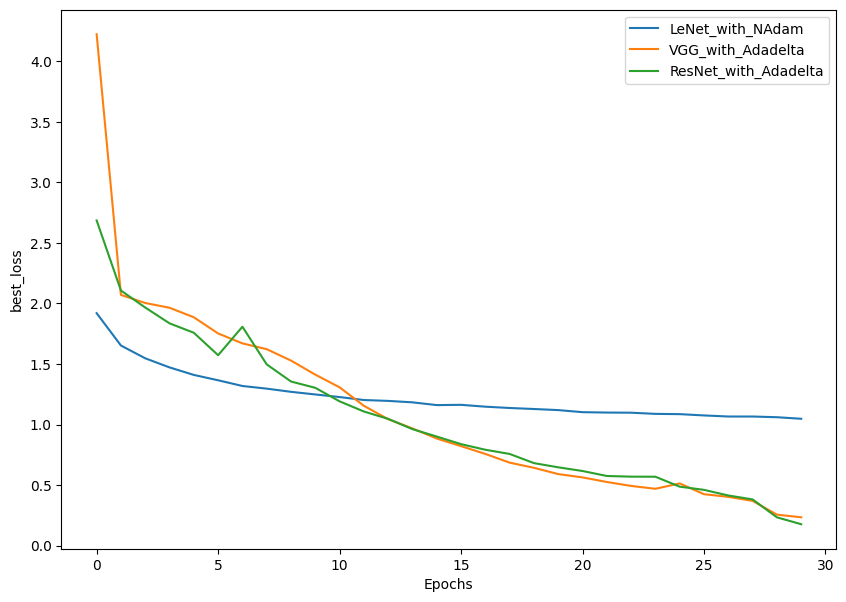

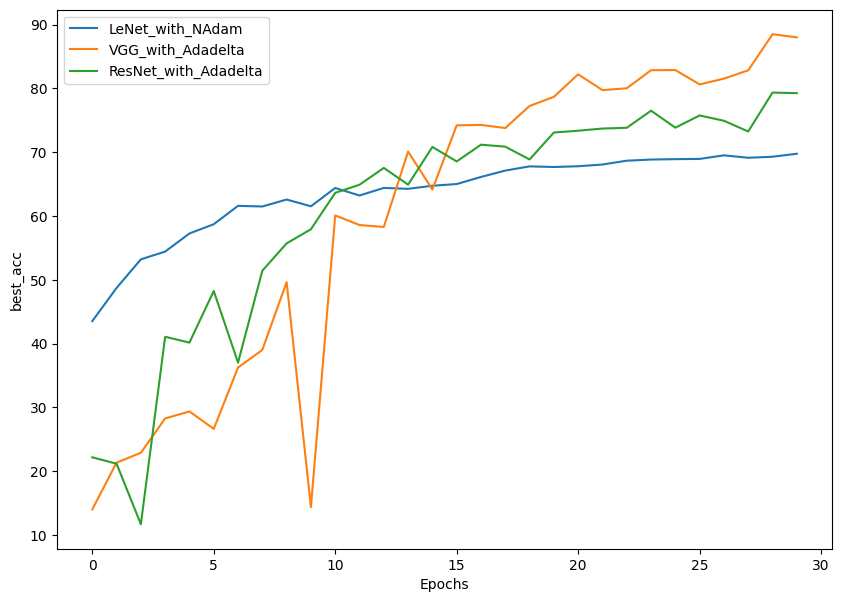

In [53]:
save_plot(
    np.array([model['train_losses'] for model in best_of_class]).T,
    f"best_loss",
    [model["name"] for model in best_of_class],
)
save_plot(
    np.array([model['val_accs'] for model in best_of_class]).T,
    f"best_acc",
    [model["name"] for model in best_of_class],
)